In [5]:
import urllib
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
%matplotlib inline
import os
import pandas as pd
import librosa
import glob 

In [2]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00001, lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [10]:
# not working 
 
# evaluate loaded model on test data

score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

NameError: name 'x_testcnn' is not defined

# Testing wav

In [10]:
data, sampling_rate = librosa.load('output10.wav')

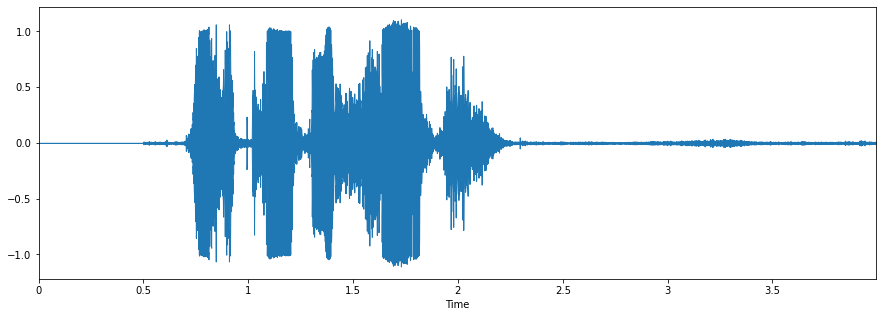

In [11]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

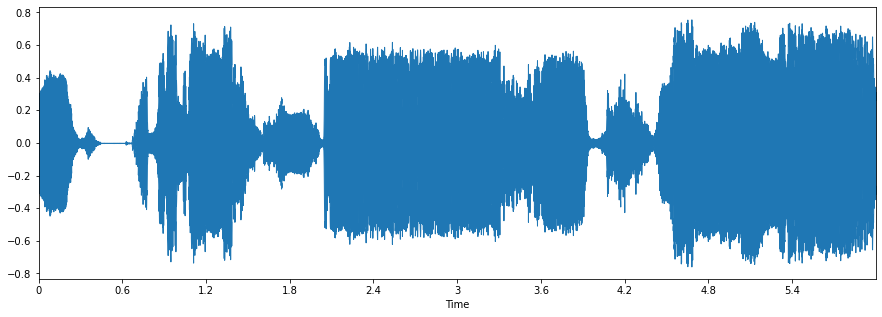

In [12]:
data, sampling_rate = librosa.load('test2.wav')
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [17]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [18]:
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-18.203562,-21.471832,-22.522213,-21.712261,-22.264282,-20.707907,-21.726439,-21.76865,-24.302736,-22.250633,...,-24.273823,-24.639935,-24.929155,-24.439188,-25.210173,-24.740648,-22.311916,-22.579805,-22.314659,-21.552433


In [19]:
twodim= np.expand_dims(livedf2, axis=2)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)
livepreds

1/1 [==============================] - 0s 4ms/step


array([[9.2405960e-22, 0.0000000e+00, 3.6239666e-26, 1.3068814e-36,
        4.4725736e-28, 1.0000000e+00, 1.8019734e-30, 2.7687818e-27,
        3.6222167e-23, 1.6739282e-11]], dtype=float32)

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [23]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
# livepredictions = (lb.inverse_transform((liveabc)))
# livepredictions



In [24]:
liveabc

array([5])

# Test

In [3]:
def get_emotion(audio_path):
    X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    featurelive = mfccs
    livedf2 = featurelive
    livedf2= pd.DataFrame(data=livedf2)
    livedf2 = livedf2.stack().to_frame().T
    # livedf2
    twodim= np.expand_dims(livedf2, axis=2)
    livepreds = loaded_model.predict(twodim, 
                             batch_size=32, 
                             verbose=1)
    # livepreds
    livepreds1=livepreds.argmax(axis=1)
    liveabc = livepreds1.astype(int).flatten()
    return liveabc

In [6]:
get_emotion('output10.wav')

1/1 [==============================] - 0s 1ms/step


array([5])

In [8]:
get_emotion('796741862_s7170_d60.mp4')

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 9ms/step


array([7])

In [3]:
links = [
    'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/797110392_s14490_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/796741862_s7170_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/796593521_s1350_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/795323567_s33510_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/795323567_s32310_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/794871676_s7440_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/792739531_s19290_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/792764202_s16860_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/790409047_s1440_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/790193120_s2460_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/789763259_s16380_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/786127949_s17400_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/780424731_s34980_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/780347531_s3810_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/774670990_s29910_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/769588654_s24000_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/769286684_s5100_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/763722162_s13290_d60.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/721083276_s6819_d30.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/717096688_s1470_d30.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/716822577_s12074_d30.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/716354179_s6944_d30.mp4',
'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/715297637_s6078_d30.mp4',]

In [34]:
link = 'https://s3.amazonaws.com/endorse.gg.vod.assets/clips/796593521_s1350_d60.mp4'

In [6]:
for link in links[:2]:
    urllib.request.urlretrieve (link, link.split('/')[-1])
    print("Downloaded: {}".format(link))

Downloaded: https://s3.amazonaws.com/endorse.gg.vod.assets/clips/797110392_s14490_d60.mp4
Downloaded: https://s3.amazonaws.com/endorse.gg.vod.assets/clips/796741862_s7170_d60.mp4


In [41]:
for link in links:
    audio_path = link.split('/')[-1]
    print(get_emotion(audio_path))

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 1ms/step
[5]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 4ms/step
[7]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 1ms/step
[7]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 2ms/step
[7]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 4ms/step
[9]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 3ms/step
[5]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 1ms/step
[7]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 5ms/step
[8]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 2ms/step
[8]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 9ms/step
[2]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 1ms/step
[4]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 2ms/step
[7]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 2ms/step
[7]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 6ms/step
[7]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 12ms/step
[7]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 2ms/step
[4]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 1ms/step
[7]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 2ms/step
[5]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 5ms/step
[8]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 23ms/step
[5]


/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 1ms/step
[7]
